# MMA/MMAB/MMAI 869 2024: Individual Assignment

Version 1: Updated June 9, 2023

<font color='red'>\# TODO: fill in the below</font>

- [Joji Antony, Zacharias]
- [20380573]
- [MMA2024S]
- [The Godfather]
- [10-Dec-2023]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook.

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal.
- Please submit the PDF export of the Notebook.
   - Please name the PDF file `2024_869_FirstnameLastName.pdf`
      - E.g., `2024_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [2]:
import datetime
import pandas as pd
import numpy as np

In [3]:
print(datetime.datetime.now())

2023-12-10 21:47:23.559239


In [4]:
!which python

/usr/local/bin/python


In [5]:
!python --version

Python 3.10.12


In [6]:
!echo $PYTHONPATH

/env/python


In [7]:
# TODO: install any packages you need to here. For example:
#pip install unidecode
!pip install seaborn matplotlib scipy

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst. Congratulations!

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their bank account).

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.)
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any preprocessing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data

In [8]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


Summary Statistics:
              Age         Income  SpendingScore       Savings
count  505.000000     505.000000     505.000000    505.000000
mean    59.019802   75513.291089       0.505083  11862.455867
std     24.140043   35992.922184       0.259634   4949.229253
min     17.000000   12000.000000       0.000000      0.000000
25%     34.000000   34529.000000       0.304792   6828.709702
50%     59.000000   75078.000000       0.368215  14209.932802
75%     85.000000  107100.000000       0.768279  16047.268331
max     97.000000  142000.000000       1.000000  20000.000000


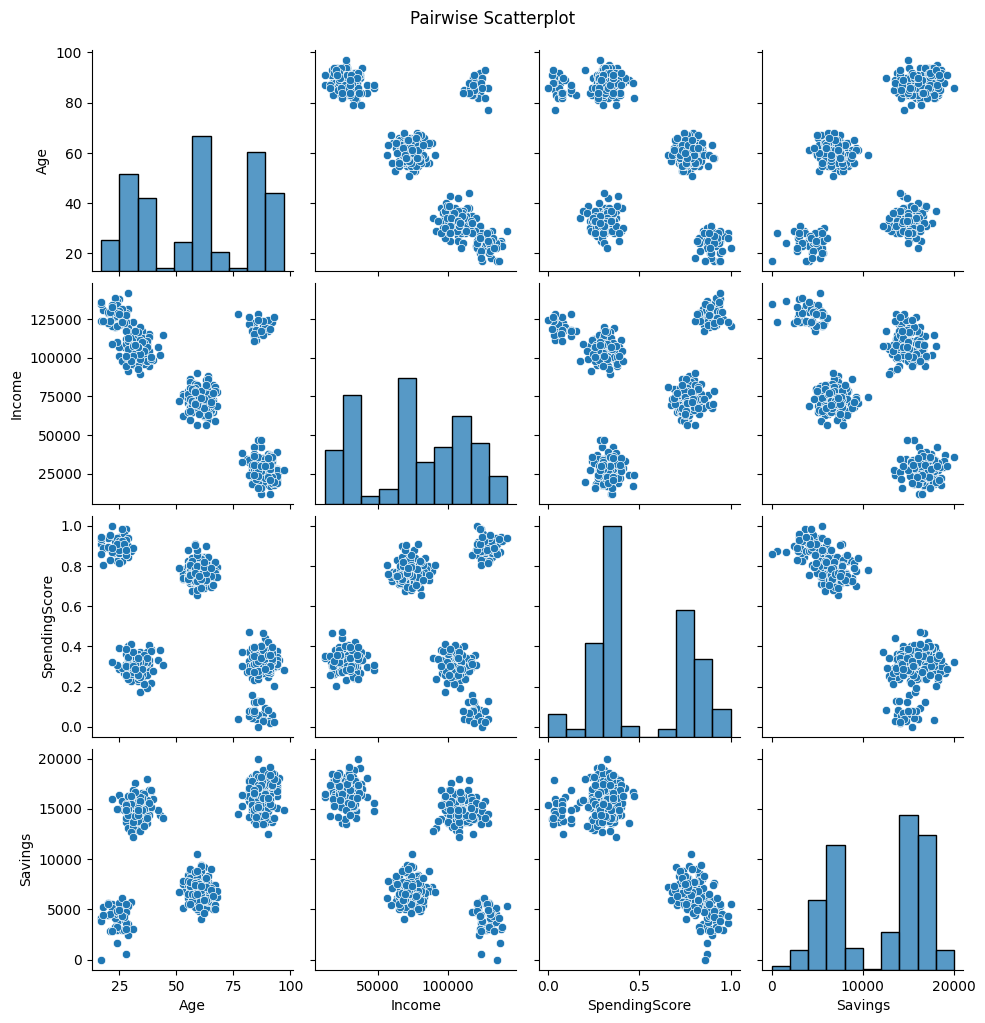

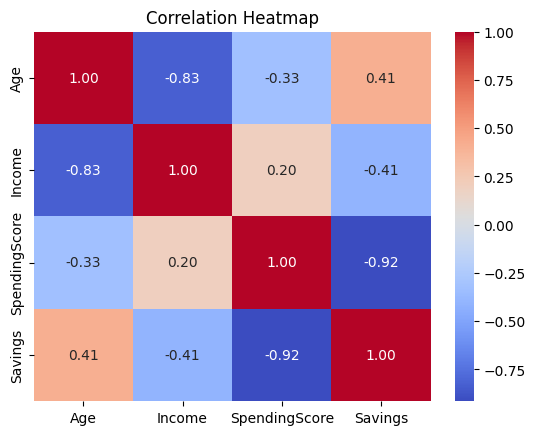

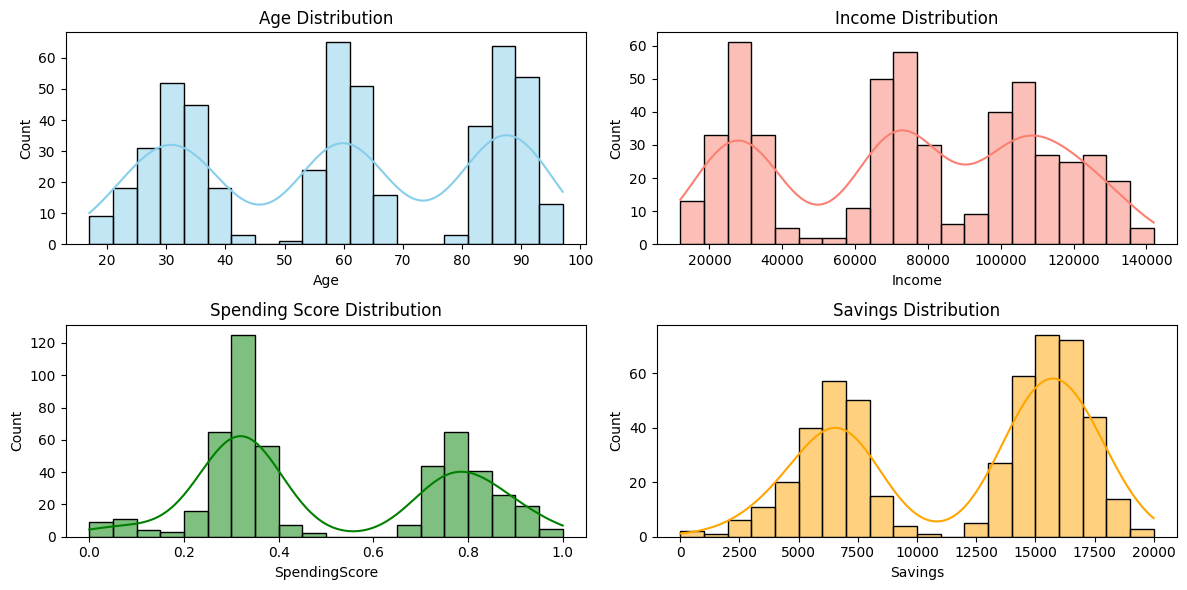

In [9]:
# EDA and Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Statistics
summary_statistics = df1.describe()
print("Summary Statistics:")
print(summary_statistics)

# Pairwise Scatterplot
sns.pairplot(df1)
plt.suptitle("Pairwise Scatterplot", y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution Plots
plt.figure(figsize=(12, 6))

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df1['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')

# Income Distribution
plt.subplot(2, 2, 2)
sns.histplot(df1['Income'], kde=True, bins=20, color='salmon')
plt.title('Income Distribution')

# Spending Score Distribution
plt.subplot(2, 2, 3)
sns.histplot(df1['SpendingScore'], kde=True, bins=20, color='green')
plt.title('Spending Score Distribution')

# Savings Distribution
plt.subplot(2, 2, 4)
sns.histplot(df1['Savings'], kde=True, bins=20, color='orange')
plt.title('Savings Distribution')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## 1.1: Clustering Algorithm #1 (K-Means Clustering)

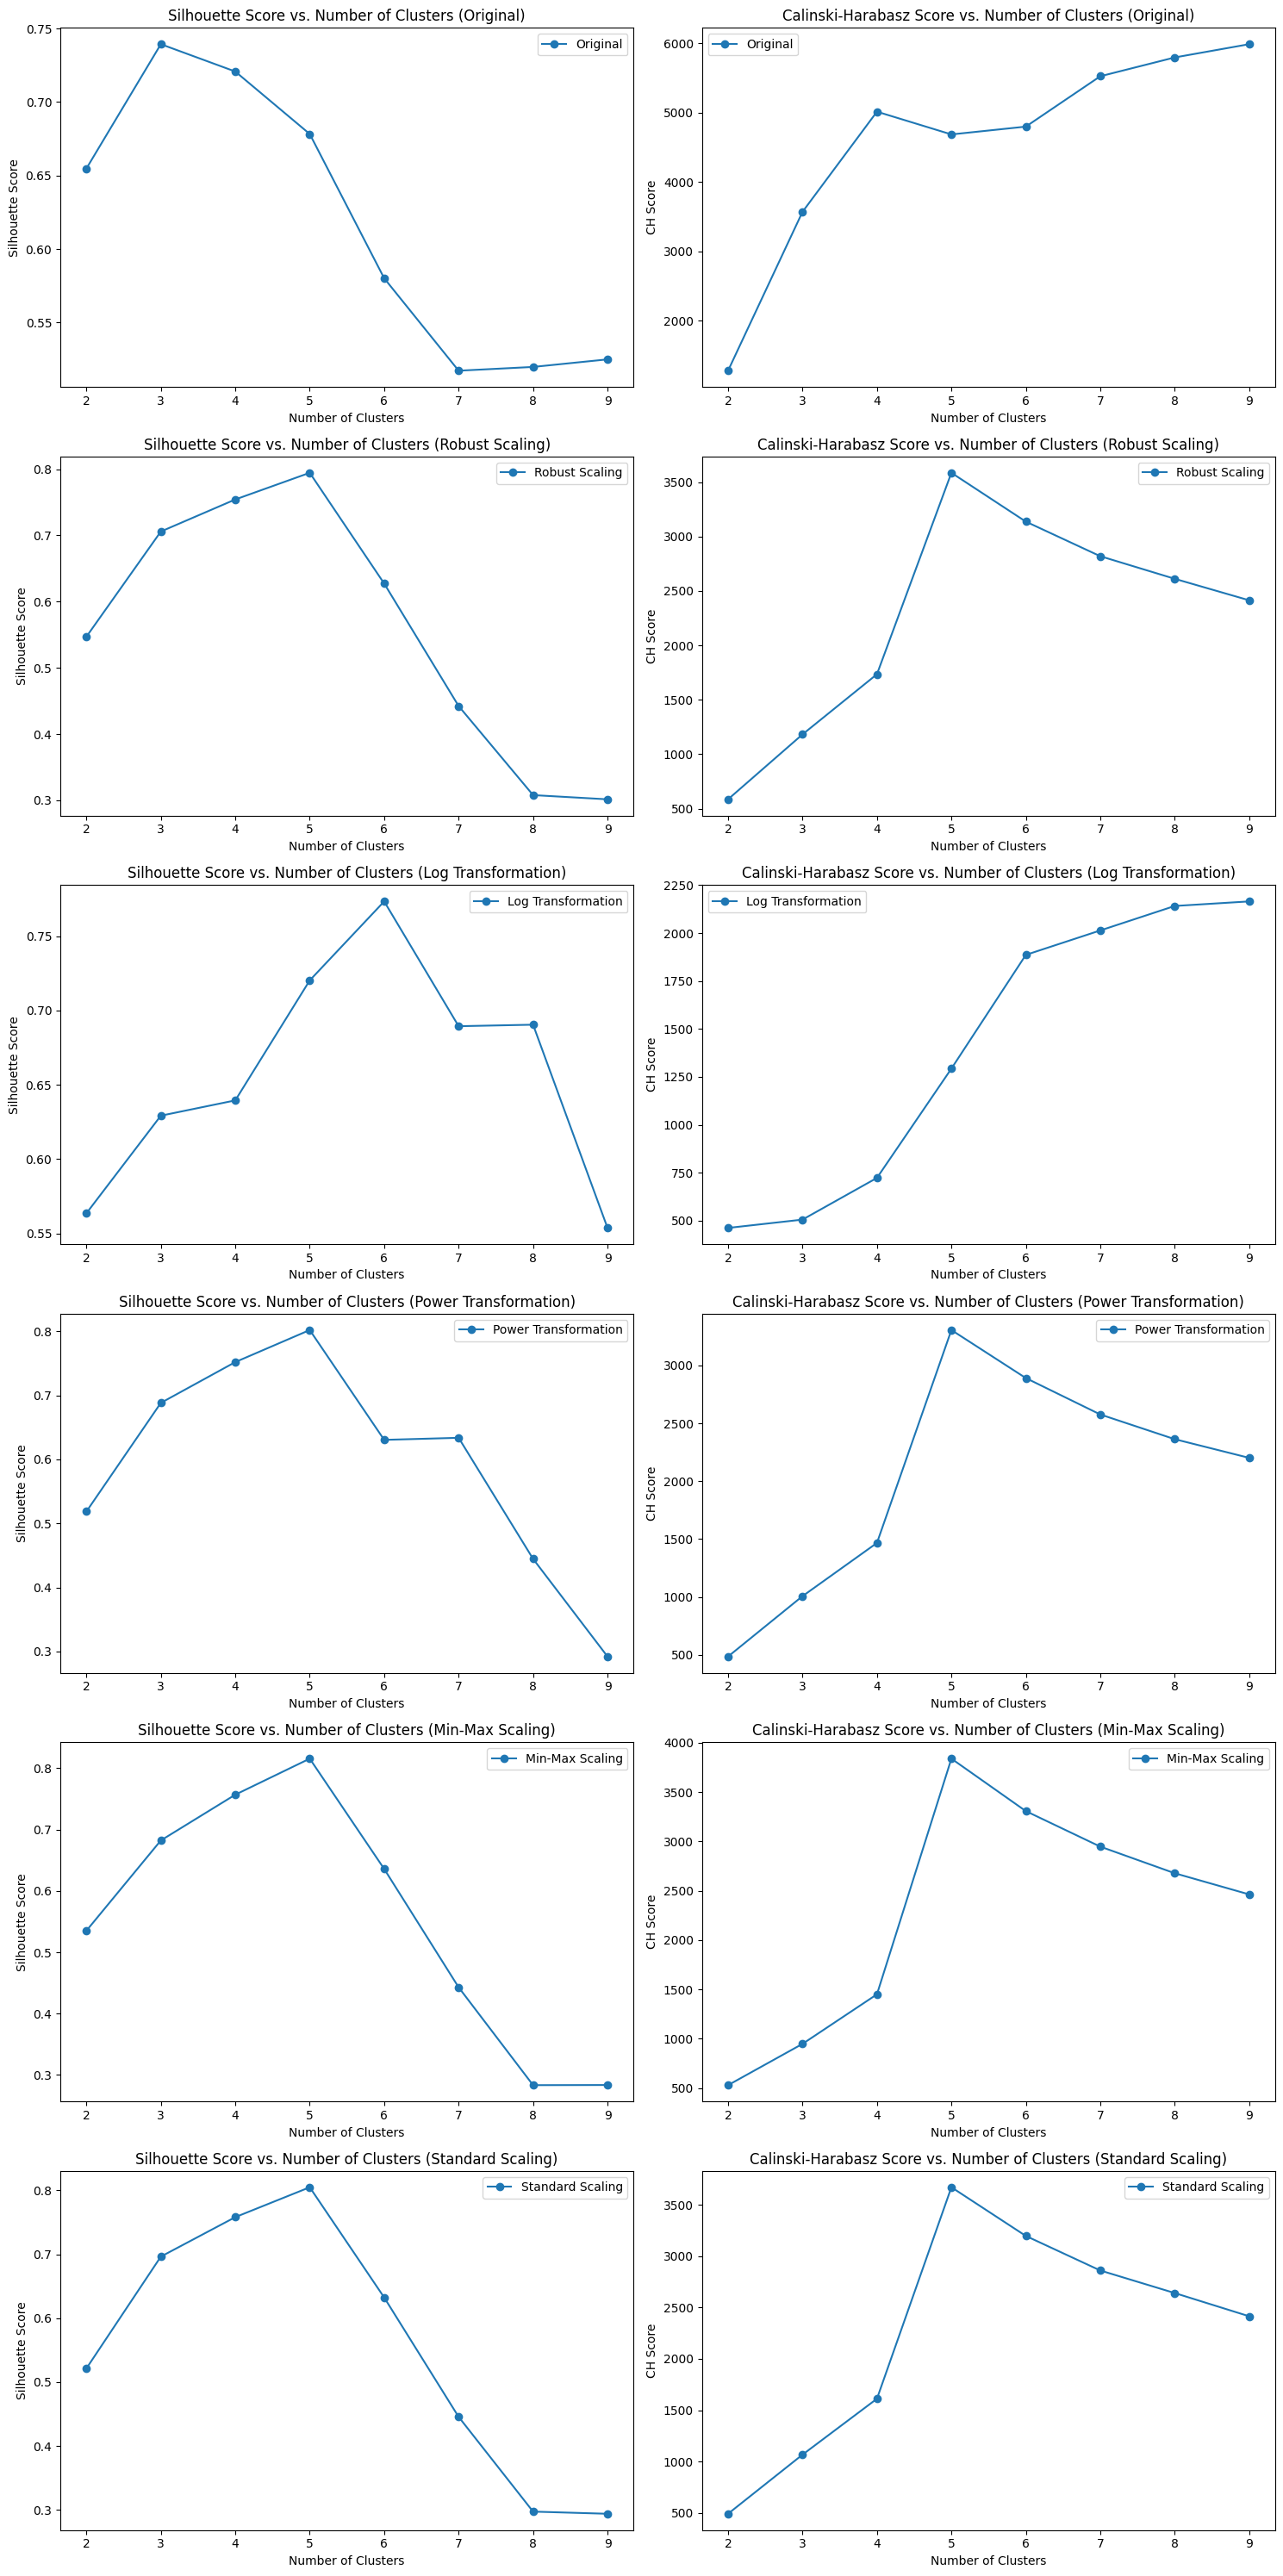


Best Configuration based on Silhouette Score:
Preprocessing    Min-Max Scaling
Clusters                       5
Silhouette              0.815691
CH_Score             3840.105431
Name: 35, dtype: object

Best Configuration based on Calinski-Harabasz Score:
Preprocessing       Original
Clusters                   9
Silhouette           0.52495
CH_Score         5984.907559
Name: 7, dtype: object


In [10]:
#Comparing K-Means clusters based on CH and silheoutte score across data pre-processing steps: Original, Standardized, Min-Max, Log, Robust Scaler, Power transformation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Set a random seed for reproducibility
np.random.seed(42)

# Define the features
features = df1.columns

# Initialize dictionary to store results
results = {'Preprocessing': [], 'Clusters': [], 'Silhouette': [], 'CH_Score': []}

# Data Preprocessing and KMeans
preprocessing_methods = {
    'Original': df1.values,
    'Robust Scaling': RobustScaler().fit_transform(df1),
    'Log Transformation': np.log1p(df1),
    'Power Transformation': PowerTransformer(method='box-cox').fit_transform(df1 - df1.min() + 1),
    'Min-Max Scaling': MinMaxScaler().fit_transform(df1),
    'Standard Scaling': StandardScaler().fit_transform(df1),
}

# Experiment with different numbers of clusters
cluster_range = range(2, 10)

# Create a DataFrame to store scores
scores_df = pd.DataFrame(index=cluster_range)

plt.figure(figsize=(15, 5 * len(preprocessing_methods)))

for i, (method, X_scaled) in enumerate(preprocessing_methods.items(), start=1):
    silhouette_scores = []
    ch_scores = []

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)

        # Calculate silhouette and CH scores
        silhouette_avg = silhouette_score(X_scaled, labels)
        ch_score = calinski_harabasz_score(X_scaled, labels)

        silhouette_scores.append(silhouette_avg)
        ch_scores.append(ch_score)

    # Add scores to the DataFrame
    scores_df[method + '_Silhouette'] = silhouette_scores
    scores_df[method + '_CH'] = ch_scores

    # Add scores to the results dictionary
    results['Preprocessing'].extend([method] * len(cluster_range))
    results['Clusters'].extend(cluster_range)
    results['Silhouette'].extend(silhouette_scores)
    results['CH_Score'].extend(ch_scores)

    # Plot side-by-side comparison
    plt.subplot(len(preprocessing_methods), 2, i * 2 - 1)
    plt.plot(cluster_range, silhouette_scores, marker='o', label=method)
    plt.title(f'Silhouette Score vs. Number of Clusters ({method})')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()

    plt.subplot(len(preprocessing_methods), 2, i * 2)
    plt.plot(cluster_range, ch_scores, marker='o', label=method)
    plt.title(f'Calinski-Harabasz Score vs. Number of Clusters ({method})')
    plt.xlabel('Number of Clusters')
    plt.ylabel('CH Score')
    plt.legend()

# Display the side-by-side comparison of scores
plt.tight_layout()
plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find the best configuration based on Silhouette Score
best_silhouette_config = results_df.iloc[results_df['Silhouette'].idxmax()]

# Find the best configuration based on CH Score
best_ch_config = results_df.iloc[results_df['CH_Score'].idxmax()]

# Print the best configurations
print("\nBest Configuration based on Silhouette Score:")
print(best_silhouette_config)

print("\nBest Configuration based on Calinski-Harabasz Score:")
print(best_ch_config)


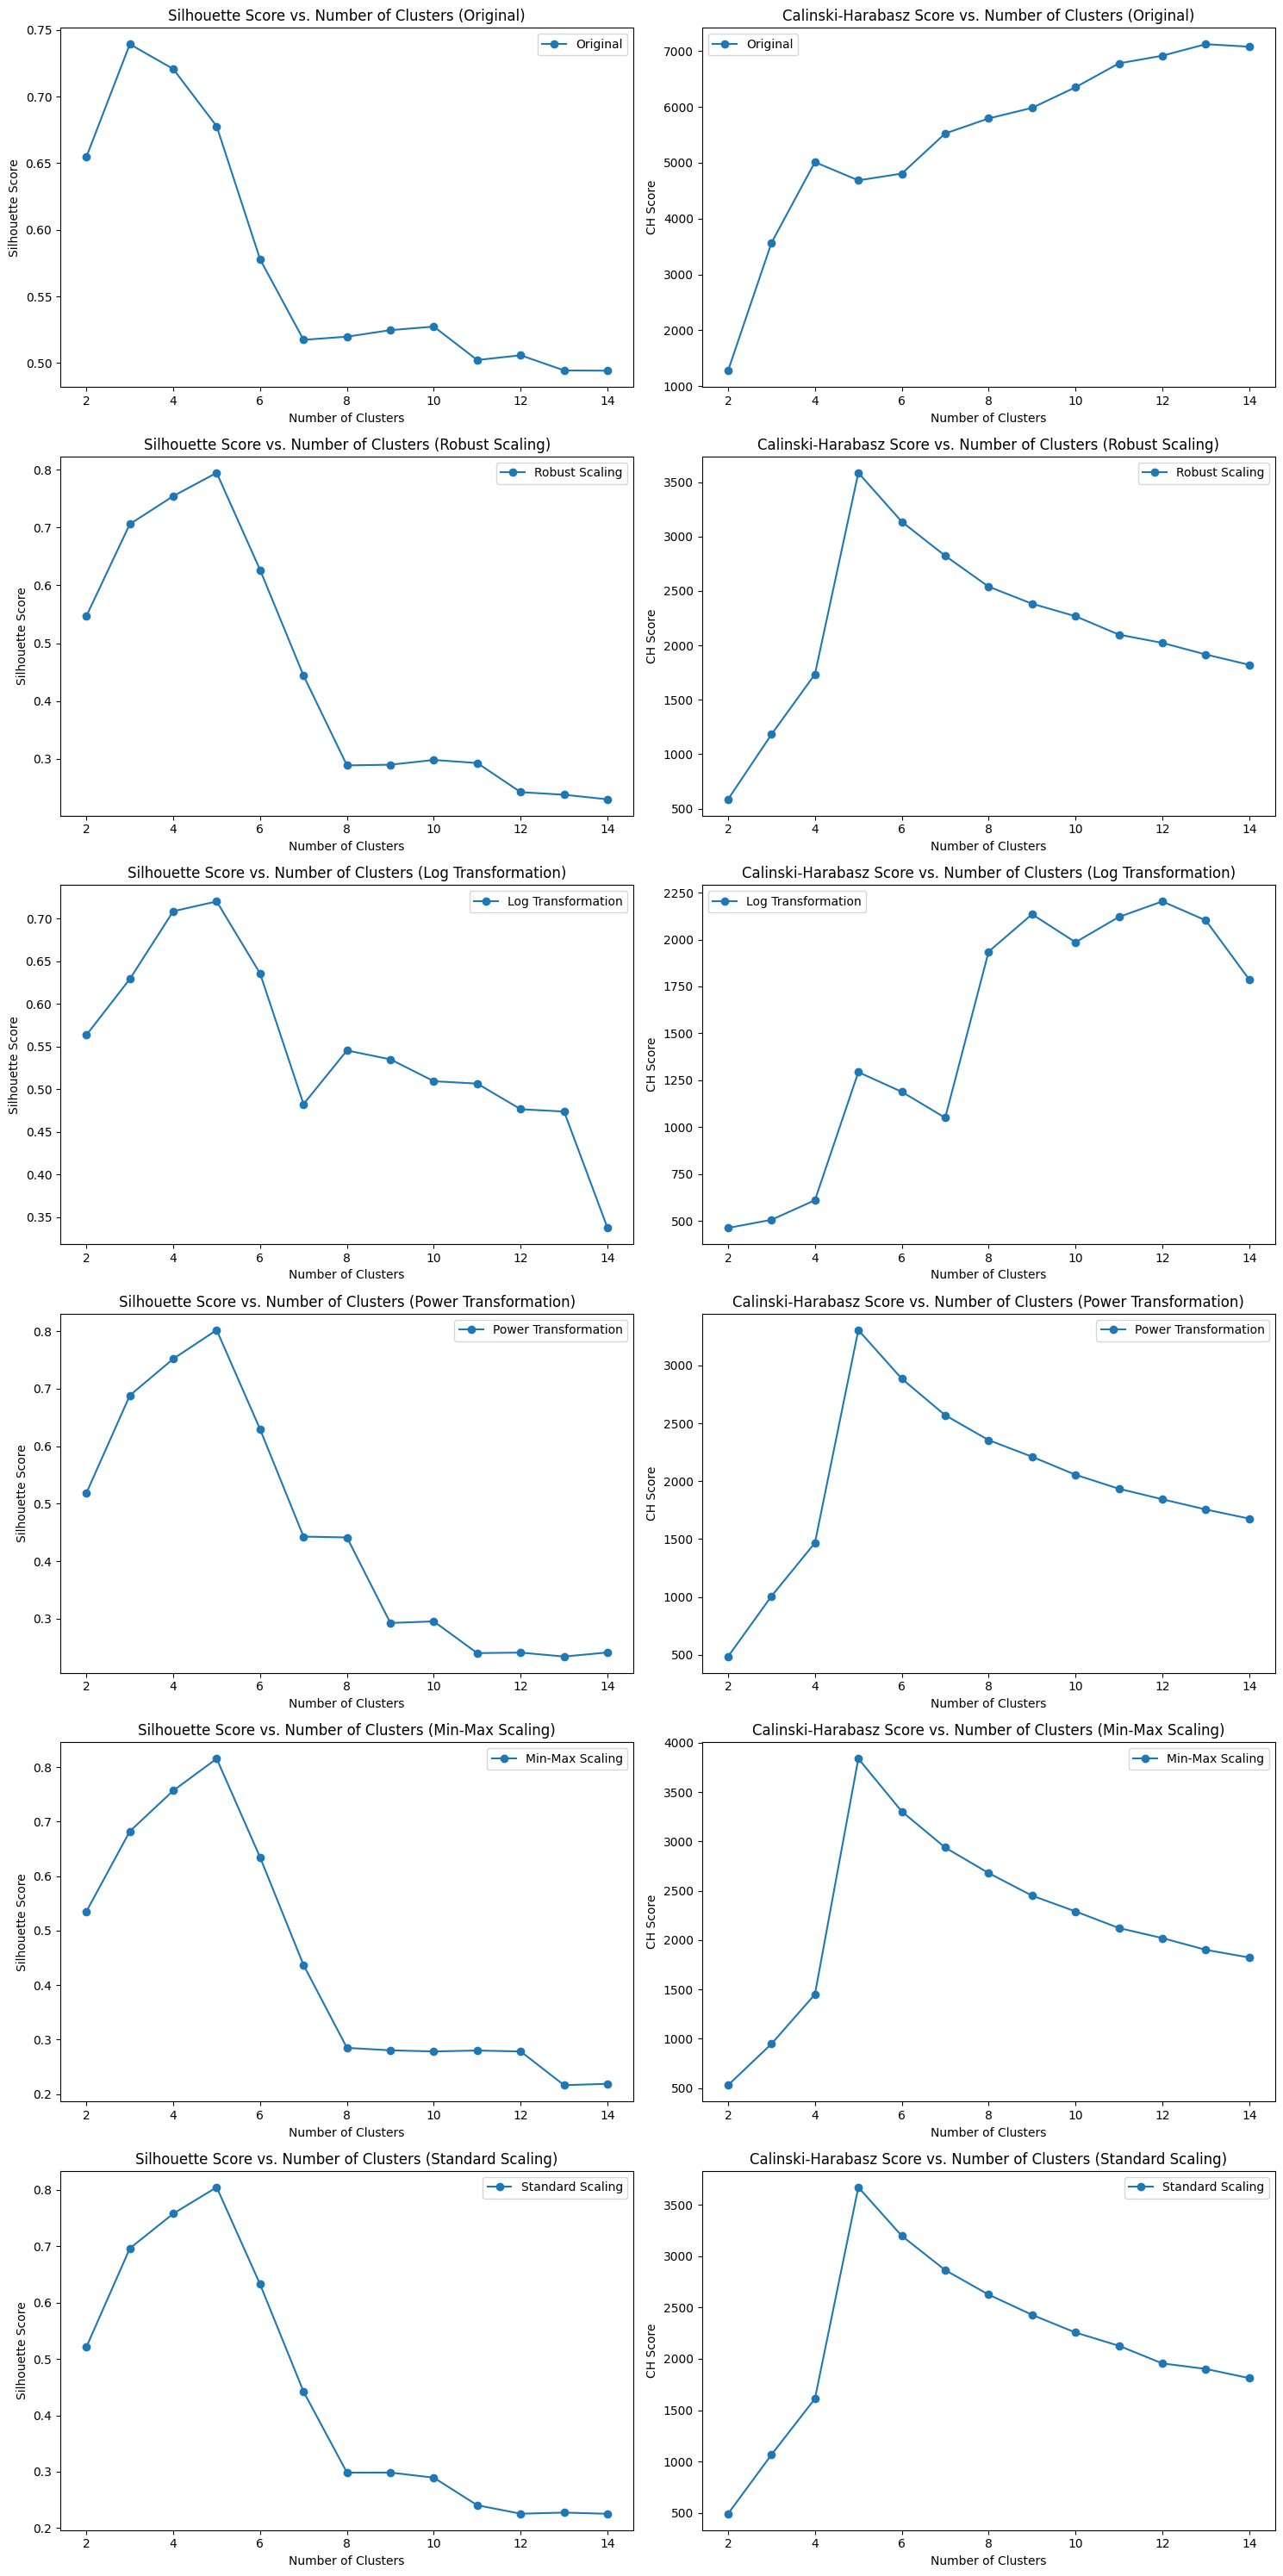


Best Configuration based on Silhouette Score:
Preprocessing    Min-Max Scaling
Clusters                       5
Silhouette              0.815691
CH_Score             3840.105431
Name: 55, dtype: object

Best Configuration based on Calinski-Harabasz Score:
Preprocessing       Original
Clusters                  13
Silhouette          0.494499
CH_Score         7123.341065
Name: 11, dtype: object


In [11]:
#Clustering with hyperparameter tuning (Using init=random and increasing max_iter = 700, n_init=20 and increasing n_clusters range to 15)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Set a random seed for reproducibility
np.random.seed(42)

# Define the features
features = df1.columns

# Initialize dictionary to store results
results = {'Preprocessing': [], 'Clusters': [], 'Silhouette': [], 'CH_Score': []}

# Data Preprocessing and KMeans
preprocessing_methods = {
    'Original': df1.values,
    'Robust Scaling': RobustScaler().fit_transform(df1),
    'Log Transformation': np.log1p(df1),
    'Power Transformation': PowerTransformer(method='box-cox').fit_transform(df1 - df1.min() + 1),
    'Min-Max Scaling': MinMaxScaler().fit_transform(df1),
    'Standard Scaling': StandardScaler().fit_transform(df1),
}

# Experiment with different numbers of clusters and hyperparameter tuning
cluster_range = range(2, 15)

# Create a DataFrame to store scores
scores_df = pd.DataFrame(index=cluster_range, columns=[])

plt.figure(figsize=(15, 5 * len(preprocessing_methods)))

for i, (method, X_scaled) in enumerate(preprocessing_methods.items(), start=1):
    silhouette_scores = []
    ch_scores = []

    for n_clusters in cluster_range:
        # Hyperparameter tuning
        kmeans = KMeans(
                  n_clusters=n_clusters,
                  random_state=42,
                  n_init=20,
                  init='random',
                  max_iter=700,
        )
        labels = kmeans.fit_predict(X_scaled)

        silhouette_avg = silhouette_score(X_scaled, labels)
        ch_score = calinski_harabasz_score(X_scaled, labels)

        silhouette_scores.append(silhouette_avg)
        ch_scores.append(ch_score)

    # Add scores to the DataFrame
    scores_df[method + '_Silhouette'] = silhouette_scores
    scores_df[method + '_CH'] = ch_scores

    # Add scores to the DataFrame
    results['Preprocessing'].extend([method] * len(cluster_range))
    results['Clusters'].extend(cluster_range)
    results['Silhouette'].extend(silhouette_scores)
    results['CH_Score'].extend(ch_scores)

    # Plot side-by-side
    plt.subplot(len(preprocessing_methods), 2, i * 2 - 1)
    plt.plot(cluster_range, silhouette_scores, marker='o', label=method)
    plt.title(f'Silhouette Score vs. Number of Clusters ({method})')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()

    plt.subplot(len(preprocessing_methods), 2, i * 2)
    plt.plot(cluster_range, ch_scores, marker='o', label=method)
    plt.title(f'Calinski-Harabasz Score vs. Number of Clusters ({method})')
    plt.xlabel('Number of Clusters')
    plt.ylabel('CH Score')
    plt.legend()

# Display the side-by-side comparison of scores
plt.tight_layout()
plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find the best configuration based on Silhouette Score
best_silhouette_config = results_df.iloc[results_df['Silhouette'].idxmax()]

# Find the best configuration based on CH Score
best_ch_config = results_df.iloc[results_df['CH_Score'].idxmax()]

# Print the best configurations
print("\nBest Configuration based on Silhouette Score:")
print(best_silhouette_config)

print("\nBest Configuration based on Calinski-Harabasz Score:")
print(best_ch_config)

### 1.1.1: Clustering Algorithm #1 (Clustering Interpretation)

Cluster Statistics:
               Age         Income  SpendingScore       Savings
Cluster                                                       
0        32.777778  105265.809524       0.309926  14962.778066
1        87.775510   27866.102041       0.328800  16659.261445
2        59.955414   72448.063694       0.771518   6889.972190
3        24.180000  128029.120000       0.896892   4087.520309
4        86.000000  119944.040000       0.068378  14808.683793

Example Records from Each Cluster:
     Age  Income  SpendingScore       Savings  Cluster
315   33   94964       0.330233  14018.349867        0
55    91   26917       0.376714  17986.618645        1
462   56   65313       0.754603   5574.243677        2
217   23  129937       0.872736   4102.065425        3
46    83  119429       0.042155  15607.561541        4


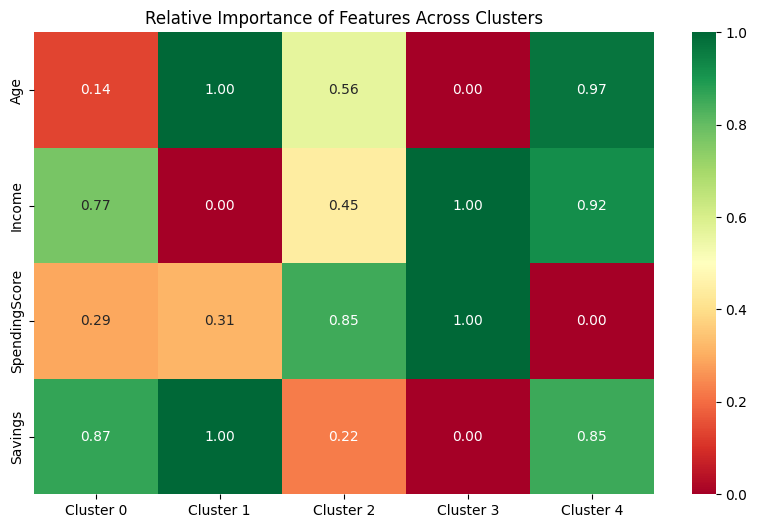

In [12]:
# Printing out mean statistics, exemplars and feature importance plots for each of the 5 clusters identified
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Use the best configuration from the clustering with hyperparameter tuning
best_kmeans_config = best_silhouette_config  # You can change this to best_ch_config if needed
best_kmeans_n_clusters = best_kmeans_config['Clusters']

# Apply KMeans with the best configuration
kmeans = KMeans(n_clusters=best_kmeans_n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(MinMaxScaler().fit_transform(df1))

# Add cluster labels to the original dataframe
df1['Cluster'] = labels

# Display cluster statistics
cluster_stats_kmeans = df1.groupby('Cluster').mean()
print("Cluster Statistics:")
print(cluster_stats_kmeans)

# Exemplars from each cluster
example_records = []

# Iterate over clusters
for cluster_id in range(best_kmeans_n_clusters):
    # Find one record from the current cluster
    example_record = df1[df1['Cluster'] == cluster_id].sample(1)
    example_records.append(example_record)

# Concatenate the example records into a new DataFrame
example_records_df = pd.concat(example_records)

# Display the example records
print("\nExample Records from Each Cluster:")
print(example_records_df)

# Feature heatmap on transformed data (Min-Max scaler) for clustering built above
# Calculate the mean feature values for each cluster
cluster_means = df1.groupby('Cluster').mean()

# Calculate the overall mean for each feature
overall_means = df1.drop('Cluster', axis=1).mean()

# Calculate the relative importance by comparing the cluster means to the overall means
relative_importance = cluster_means - overall_means

# Use Min-Max scaler
scaler = MinMaxScaler()
relative_importance_scaled = scaler.fit_transform(relative_importance)

# Set up the plot
plt.figure(figsize=(10, 6))
plt.title('Relative Importance of Features Across Clusters')

# Create the heatmap with scaled values
sns.heatmap(data=relative_importance_scaled.T,
            annot=True,
            fmt='.2f',
            cmap='RdYlGn',
            robust=True,
            square=False,
            xticklabels=['Cluster {}'.format(x) for x in relative_importance.index],
            yticklabels=relative_importance.columns)

plt.show()

## 1.2: Clustering Algorithm #2 (Agglomerative hierarchical Clustering)

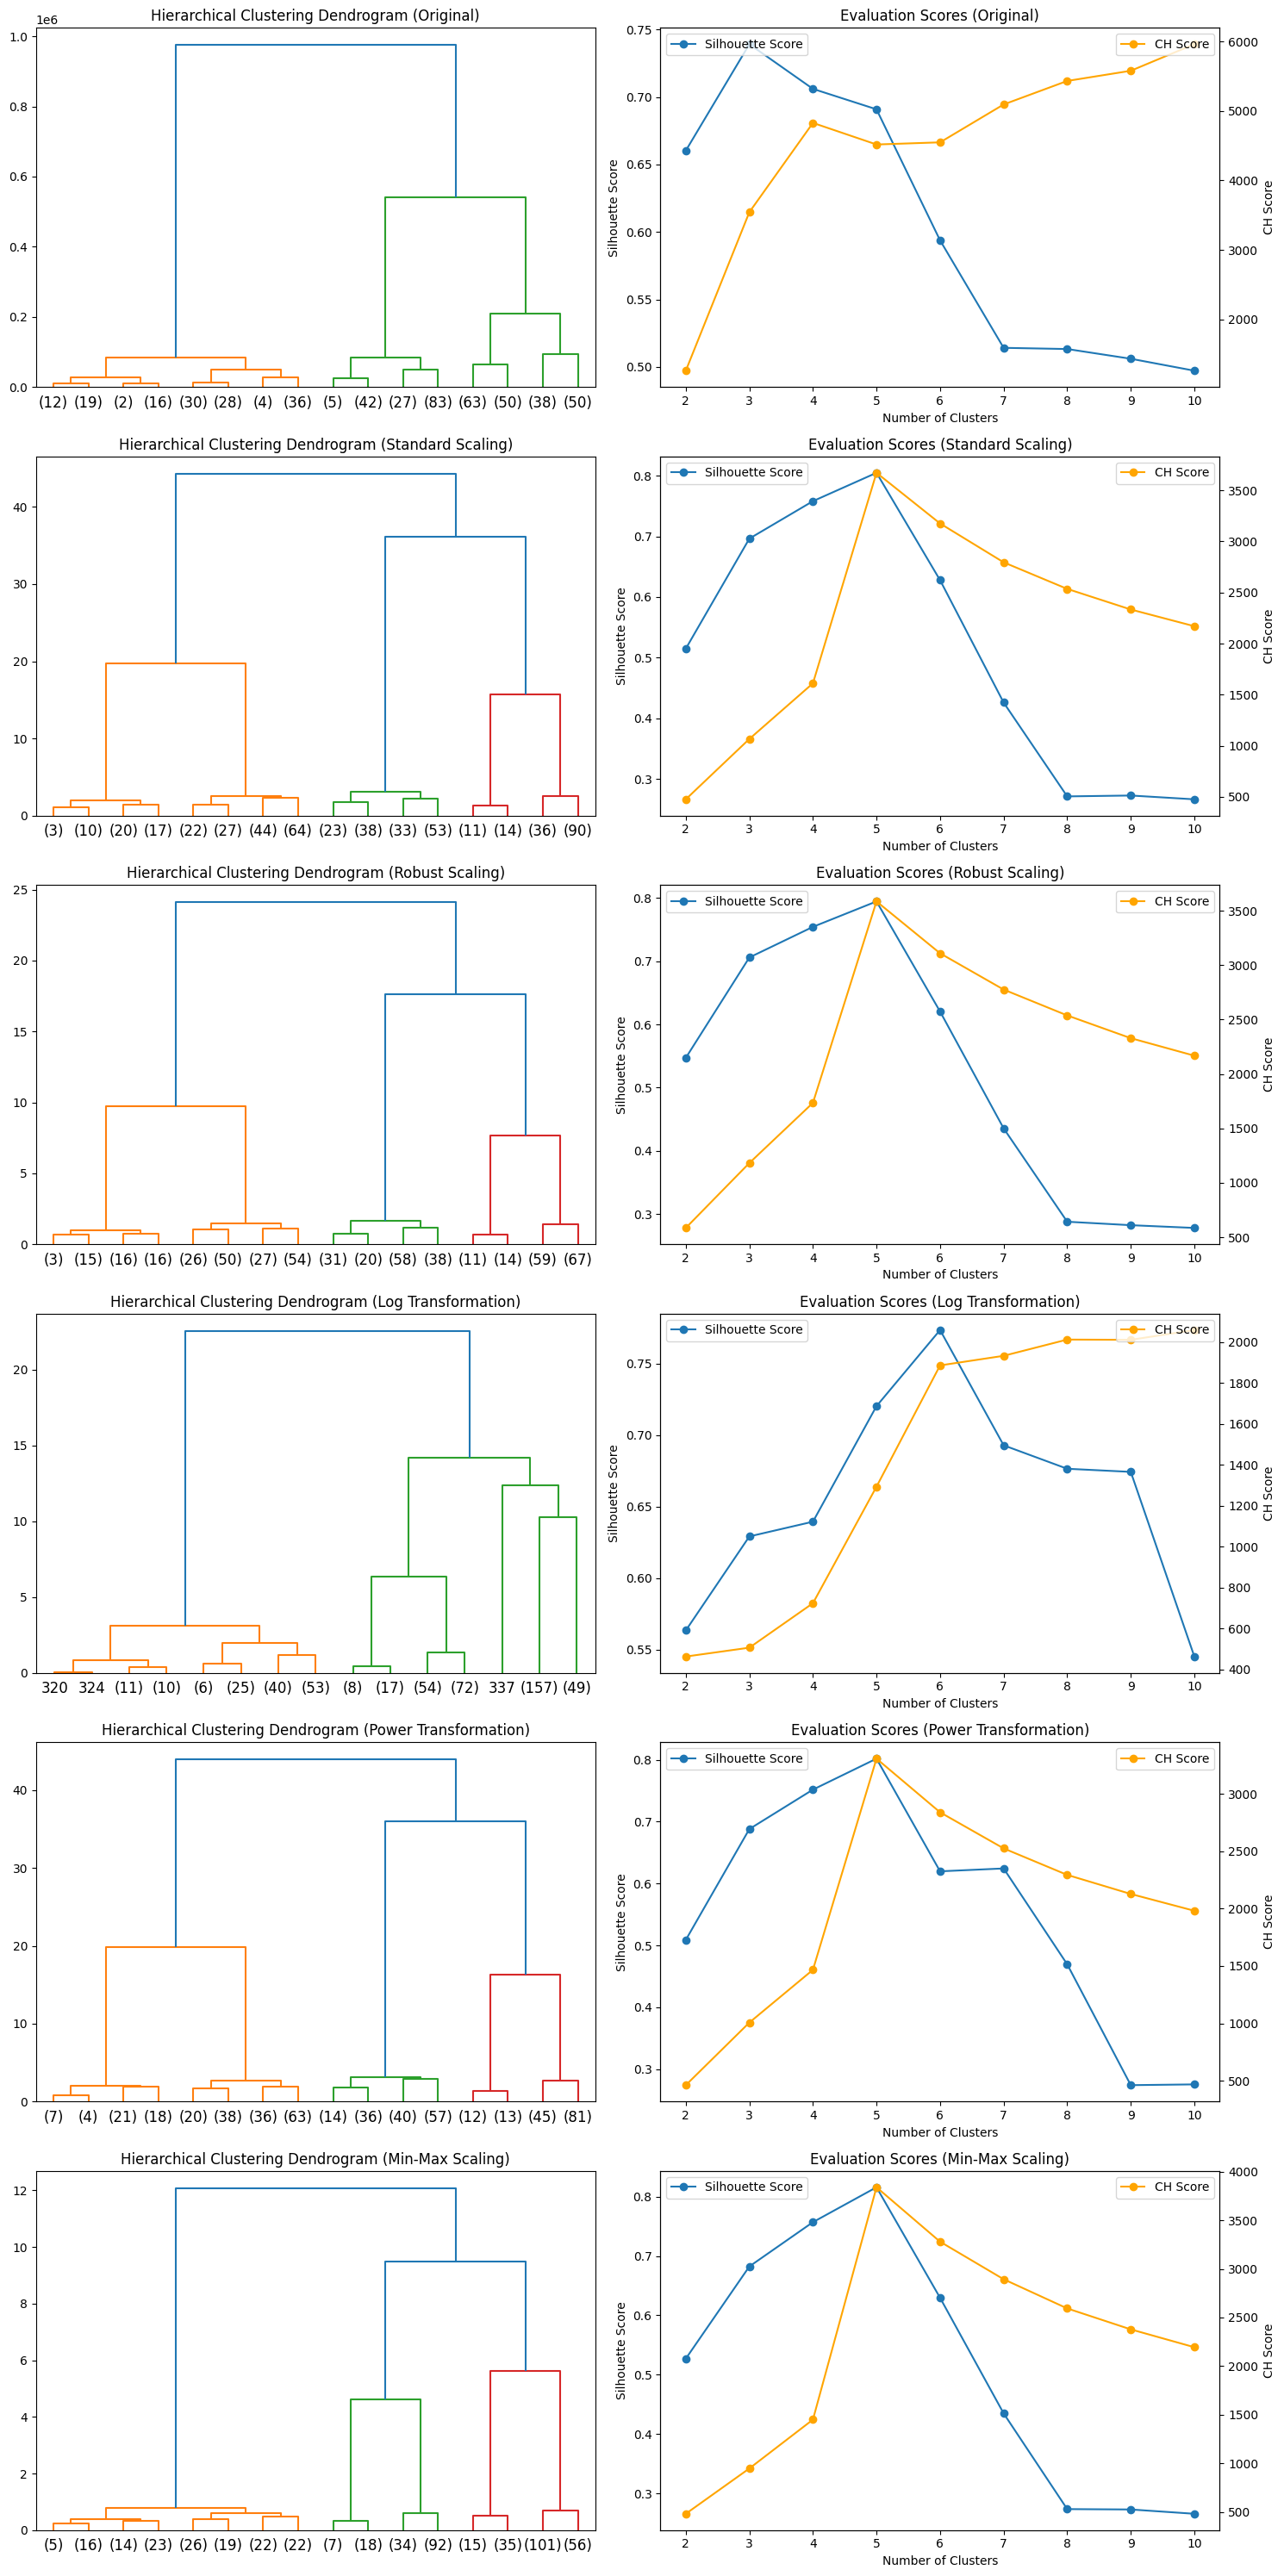


Best Configuration based on Silhouette Score:
Preprocessing    Min-Max Scaling
Clusters                       5
Silhouette              0.815691
CH_Score             3840.105431
Name: 48, dtype: object

Best Configuration based on Calinski-Harabasz Score:
Preprocessing       Original
Clusters                  10
Silhouette          0.497257
CH_Score         5960.182258
Name: 8, dtype: object


In [13]:
# Building an agglomerative hierarchical clustering over a range of data pre-processing techniques and clusters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Load the dataset from Google Drive
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")

# Data Preprocessing and Hierarchical Clustering
preprocessing_methods = {
    'Original': df1.values,
    'Standard Scaling': StandardScaler().fit_transform(df1),
    'Robust Scaling': RobustScaler().fit_transform(df1),
    'Log Transformation': np.log1p(df1),
    'Power Transformation': PowerTransformer(method='box-cox').fit_transform(df1 - df1.min() + 1),
    'Min-Max Scaling': MinMaxScaler().fit_transform(df1)
}

# Experiment with different numbers of clusters
cluster_range = range(2, 11)

# Visualize clusters for each preprocessing method using Hierarchical Clustering
plt.figure(figsize=(15, 5 * len(preprocessing_methods)))

results_df = pd.DataFrame(columns=['Preprocessing', 'Clusters', 'Silhouette', 'CH_Score'])

for i, (method, X_scaled) in enumerate(preprocessing_methods.items(), start=1):
    # Plot dendrogram
    plt.subplot(len(preprocessing_methods), 2, i * 2 - 1)
    Z = linkage(X_scaled, method='ward')
    dendrogram(Z, truncate_mode='level', p=3)
    plt.title(f'Hierarchical Clustering Dendrogram ({method})')

    silhouette_scores = []
    ch_scores = []

    for n_clusters in cluster_range:
        # Hierarchical clustering
        labels = fcluster(Z, n_clusters, criterion='maxclust')

        # Evaluate clustering performance
        silhouette_avg = silhouette_score(X_scaled, labels)
        ch_score = calinski_harabasz_score(X_scaled, labels)

        silhouette_scores.append(silhouette_avg)
        ch_scores.append(ch_score)

    # Plot Silhouette and CH Scores
    plt.subplot(len(preprocessing_methods), 2, i * 2)
    plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend(loc='upper left')

    ax2 = plt.gca().twinx()
    ax2.plot(cluster_range, ch_scores, marker='o', color='orange', label='CH Score')
    ax2.set_ylabel('CH Score')
    ax2.legend(loc='upper right')

    plt.title(f'Evaluation Scores ({method})')

    # Store results in DataFrame
    method_results = pd.DataFrame({
        'Preprocessing': [method] * len(cluster_range),
        'Clusters': cluster_range,
        'Silhouette': silhouette_scores,
        'CH_Score': ch_scores
    })
    results_df = pd.concat([results_df, method_results], ignore_index=True)

plt.tight_layout()
plt.show()

# Find the best configuration based on Silhouette Score
best_silhouette_config = results_df.iloc[results_df['Silhouette'].idxmax()]

# Find the best configuration based on CH Score
best_ch_config = results_df.iloc[results_df['CH_Score'].idxmax()]

# Print the best configurations
print("\nBest Configuration based on Silhouette Score:")
print(best_silhouette_config)

print("\nBest Configuration based on Calinski-Harabasz Score:")
print(best_ch_config)

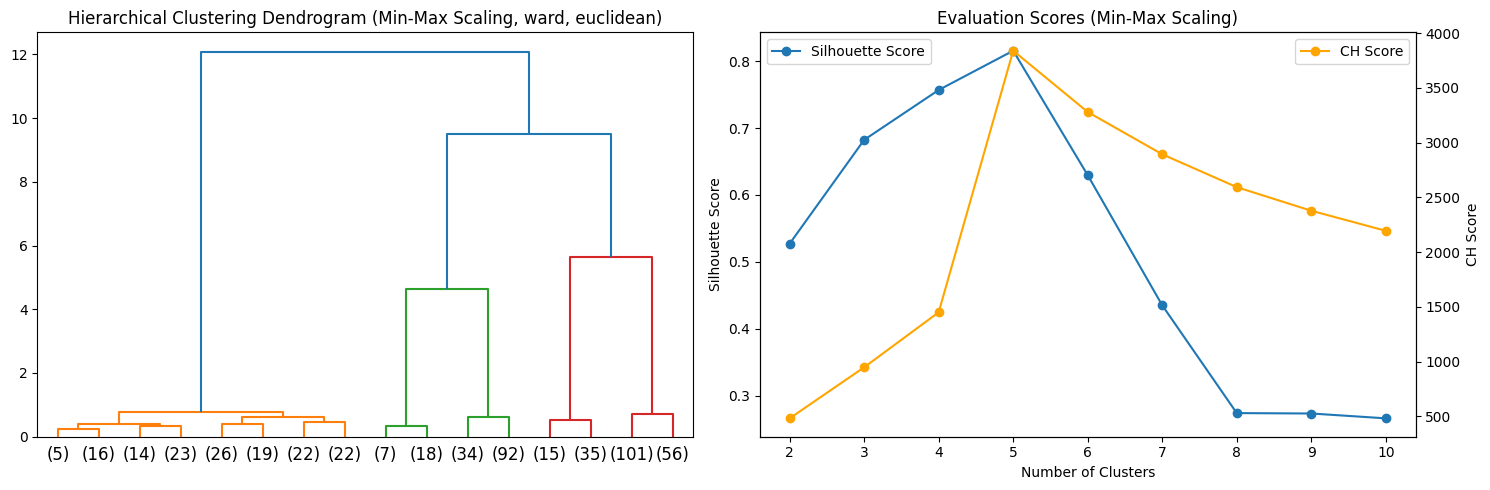


Best Configuration based on Silhouette Score:
Preprocessing    Min-Max Scaling
Clusters                       5
Silhouette              0.815691
CH_Score             3840.105431
Linkage                     ward
Metric                 euclidean
Name: 0, dtype: object

Best Configuration based on Calinski-Harabasz Score:
Preprocessing    Min-Max Scaling
Clusters                       5
Silhouette              0.815691
CH_Score             3840.105431
Linkage                     ward
Metric                 euclidean
Name: 0, dtype: object


In [14]:
# Hyperparameter tuning for the data pre-processing technique with the best configuration (Min-Max Scaler)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Data Preprocessing
preprocessing_methods = {
    'Min-Max Scaling': MinMaxScaler().fit_transform(df1)
}

# Experiment with different numbers of clusters
cluster_range = range(2, 11)

# Hyperparameter combinations
best_config = {'Linkage': 'ward', 'Metric': 'euclidean'}
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_metric = 'euclidean'  # Fixed distance metric for 'ward' linkage

# Visualize clusters for Min-Max Scaling using Agglomerative Clustering
plt.figure(figsize=(15, 5 * len(preprocessing_methods)))

# Initialize best configuration variables
best_silhouette_config = None
best_ch_config = None
best_silhouette_score = -1  # Initialize to a lower value
best_ch_score = -1  # Initialize to a lower value

# Initialize results DataFrame with additional columns
results_df = pd.DataFrame(columns=['Preprocessing', 'Clusters', 'Silhouette', 'CH_Score', 'Linkage', 'Metric'])

# Iterate over methods
for i, (method, X_scaled) in enumerate(preprocessing_methods.items(), start=1):
    plt.subplot(len(preprocessing_methods), 2, i * 2)

    silhouette_scores = []
    ch_scores = []

    # Iterate over cluster sizes
    for n_clusters in cluster_range:
        # Hyperparameter tuning
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=best_config['Linkage'], metric=best_config['Metric'])
        labels = clustering.fit_predict(X_scaled)

        # Evaluate clustering performance
        silhouette_avg = silhouette_score(X_scaled, labels)
        ch_score = calinski_harabasz_score(X_scaled, labels)

        # Store results in DataFrame
        method_results = pd.DataFrame({
            'Preprocessing': [method],
            'Clusters': [n_clusters],
            'Silhouette': [silhouette_avg],
            'CH_Score': [ch_score],
            'Linkage': [best_config['Linkage']],
            'Metric': [best_config['Metric']]
        })

        # Update best configuration based on Silhouette Score
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_silhouette_config = method_results.iloc[0]

        # Update best configuration based on CH Score
        if ch_score > best_ch_score:
            best_ch_score = ch_score
            best_ch_config = method_results.iloc[0]

        silhouette_scores.append(silhouette_avg)
        ch_scores.append(ch_score)

    # Plot Silhouette and CH Scores on the same chart with a secondary axis for CH Score
    plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend(loc='upper left')

    ax2 = plt.gca().twinx()
    ax2.plot(cluster_range, ch_scores, marker='o', color='orange', label='CH Score')
    ax2.set_ylabel('CH Score')
    ax2.legend(loc='upper right')

    plt.title(f'Evaluation Scores ({method})')

# Display dendrogram for the best hyperparameters
plt.subplot(len(preprocessing_methods), 2, 1)
dendrogram(linkage(X_scaled, method=best_config['Linkage'], metric=best_config['Metric']), truncate_mode='level', p=3)
plt.title(f'Hierarchical Clustering Dendrogram ({method}, {best_config["Linkage"]}, {best_config["Metric"]})')

plt.tight_layout()
plt.show()

# Print the best configurations
print("\nBest Configuration based on Silhouette Score:")
print(best_silhouette_config)

print("\nBest Configuration based on Calinski-Harabasz Score:")
print(best_ch_config)

### 1.2.1: Clustering Algorithm #2 (Clustering Interpretation)

Cluster Statistics (Hierarchical Clustering):
               Age         Income  SpendingScore       Savings
Cluster                                                       
0        87.775510   27866.102041       0.328800  16659.261445
1        32.777778  105265.809524       0.309926  14962.778066
2        59.955414   72448.063694       0.771518   6889.972190
3        24.180000  128029.120000       0.896892   4087.520309
4        86.000000  119944.040000       0.068378  14808.683793

Example Records from Each Cluster:
     Age  Income  SpendingScore       Savings  Cluster
122   84   42018       0.297994  16148.370454        0
468   32  117050       0.311356  14310.546207        1
450   61   67372       0.734067   6618.549336        2
248   24  134389       0.938852   4573.606346        3
260   83  117943       0.077213  15391.952192        4


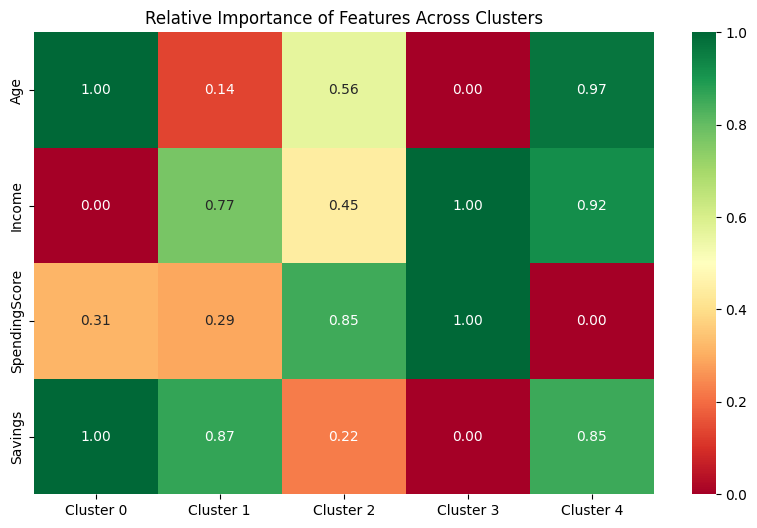

In [15]:
# Printing out mean statistics, exemplars and feature importance plots for each of the 5 clusters identified
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

# Best configuration from hierarchical clustering with hyperparameter tuning
best_config = best_silhouette_config
best_n_clusters = best_config['Clusters']

# Apply Agglomerative Clustering with the best configuration
clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_config['Linkage'], metric=best_config['Metric'])
labels = clustering.fit_predict(MinMaxScaler().fit_transform(df1))

# Add cluster labels to the original DataFrame
df1['Cluster'] = labels

# Analyzing mean statistics for hierarchical clustering
cluster_stats = df1.groupby('Cluster').mean()
print("Cluster Statistics (Hierarchical Clustering):")
print(cluster_stats)

# Exemplars from each cluster
example_records = []

# Iterate over clusters
for cluster_id in range(best_config['Clusters']):
    # Find one record from the current cluster
    example_record = df1[df1['Cluster'] == cluster_id].sample(1)
    example_records.append(example_record)

# Concatenate the example records into a new DataFrame
example_records_df = pd.concat(example_records)

# Display the example records
print("\nExample Records from Each Cluster:")
print(example_records_df)

# Feature heatmap on transformed data (Min-Max scaler) for clustering
# Calculate the mean feature values for each cluster
cluster_means = df1.groupby('Cluster').mean()

# Calculate the overall mean for each feature
overall_means = df1.drop('Cluster', axis=1).mean()

# Calculate the relative importance by comparing the cluster means to the overall means
relative_importance = cluster_means - overall_means

# Use Min-Max scaler
scaler = MinMaxScaler()
relative_importance_scaled = scaler.fit_transform(relative_importance)

# Set up the plot
plt.figure(figsize=(10, 6))
plt.title('Relative Importance of Features Across Clusters')

# Create the heatmap with scaled values
sns.heatmap(data=relative_importance_scaled.T,
            annot=True,
            fmt='.2f',
            cmap='RdYlGn',
            robust=True,
            square=False,
            xticklabels=['Cluster {}'.format(x) for x in relative_importance.index],
            yticklabels=relative_importance.columns)

plt.show()

## 1.3 Model Comparison

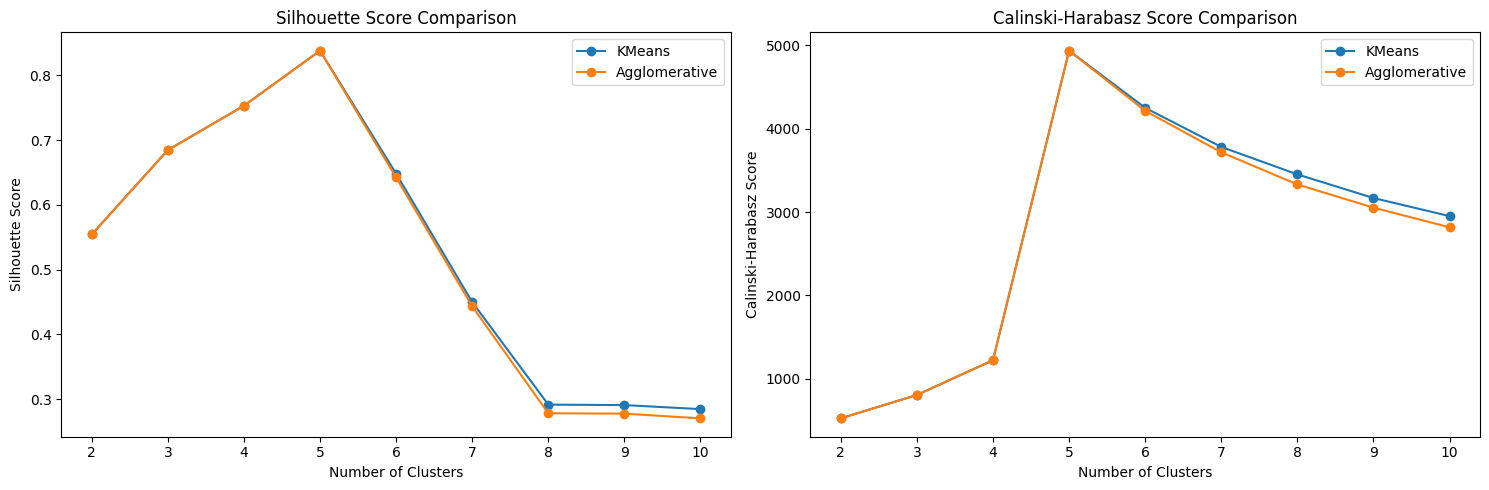

In [16]:
#Comparing the results from K-Means and Agglomerative hierarchical clustering for Min-Max scaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Select relevant features for clustering
features = ['age', 'income', 'spending_score', 'savings']
X = df1

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Part 1: KMeans Clustering
kmeans_silhouette_scores = []
kmeans_ch_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20,max_iter=700)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    ch_score = calinski_harabasz_score(X_scaled, labels)

    kmeans_silhouette_scores.append(silhouette_avg)
    kmeans_ch_scores.append(ch_score)

# Part 2: Agglomerative Hierarchical Clustering
agg_silhouette_scores = []
agg_ch_scores = []

for n_clusters in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels_agg = agg_clustering.fit_predict(X_scaled)
    silhouette_avg_agg = silhouette_score(X_scaled, labels_agg)
    ch_score_agg = calinski_harabasz_score(X_scaled, labels_agg)

    agg_silhouette_scores.append(silhouette_avg_agg)
    agg_ch_scores.append(ch_score_agg)

# Part 3: Compare the algorithms
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), kmeans_silhouette_scores, marker='o', label='KMeans')
plt.plot(range(2, 11), agg_silhouette_scores, marker='o', label='Agglomerative')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), kmeans_ch_scores, marker='o', label='KMeans')
plt.plot(range(2, 11), agg_ch_scores, marker='o', label='Agglomerative')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score Comparison')
plt.legend()

plt.tight_layout()
plt.show()

##### **Cluster Analysis Comparison: K-Means vs. Hierarchical Clustering**

In this scenario, both the k-means and hierarchical clustering algorithms resulted in the identification of five clusters. The Silhouette Score for both is 0.815691, and the Calinski-Harabasz (CH) Score is 3840.105431.

Upon comparing the outcomes of both algorithms across various cluster hyperparameters, it is noteworthy that K-means and Agglomerative hierarchical clustering converge at 5 clusters. This convergence is marked by the highest CH and silhouette scores, providing compelling evidence that 5 clusters are optimal for this dataset. Beyond 5 clusters, K-means exhibits slightly higher CH and silhouette scores from the 6th cluster onward, indicating a more accurate estimate of cluster definition compared to hierarchical clustering.

Furthermore, a visual examination of the initial Exploratory Data Analysis (EDA) and pairwise feature scatterplots reveals well-formed clusters with a spherical and well-defined appearance. This characteristic aligns well with the assumptions of K-means, making it a suitable choice for such datasets. On the other hand, while hierarchical clustering is more flexible and better suited for irregularly shaped clusters, it demands more resources and time.

#####**Winner: K-Means**

Considering Uncle Steve's requirements, the relatively higher accuracy as well as the suitability for this dataset makes K-means the more suitable clustering algorithm

## 1.4 Personas

**Thrifty Youngsters (Cluster 0):**
This cluster represents a vibrant, younger demographic in their early thirties, known as "Thrifty Youngsters." Despite having a moderately high income, they exhibit a conservative spending behavior, suggesting a thoughtful approach to their financial decisions. With a Spending Score on the lower side, these individuals prioritize financial prudence and maintain a reasonable level of savings. This segment, although having spending potential, may need targeted strategies to incentivize spending, such as promotions or discounts.

**Age:** Around 33 years old

**Income:** $105,265

**Spending Score:** Low (0.31)

**Savings:** $14,962

**Sage Savers (Cluster 1):**
This cluster, named "Sage Savers," consists of elderly individuals around 88 years old. They are conservative both in income and spending, prioritizing financial stability in their later years. With a moderate income, these individuals exhibit a careful and considered approach to expenditures, reflected in their low Spending Score. The high level of savings suggests a cautious and prudent lifestyle.

**Age:** Around 88 years old

**Income:** $27,866

**Spending Score:** Low (0.33)

**Savings:** $16,659

**Savvy Spenders (Cluster 2):**
This cluster, named the "Savvy Spenders," comprises individuals around 60 years old. Despite having a moderate income, they demonstrate a higher Spending Score, signifying a willingness to invest in experiences. What distinguishes them is their adeptness at balancing spending while maintaining a reasonable level of savings. An in-depth exploration of their price and promotion sensitivity could provide better insights into potential offerings tailored to their preferences. For instance, understanding their life stage could lead to targeted offerings such as retirement gifts or gifts for their young adult children who may be experiencing significant life events.

**Age:** Around 60 years old

**Income:** $72,448

**Spending Score:** High (0.77)

**Savings:** $6,890

**Ambitious Achievers (Cluster 3):**
Termed as the "Ambitious Achievers," this cluster comprises young individuals, averaging around 24 years old, who exhibit a strong commitment to career advancement and ambitious financial goals. Despite their early age, they possess a high income and a significantly elevated Spending Score, showcasing a proactive approach towards spending. However, they tend to maintain a lower level of savings, possibly attributed to their early-career emphasis on investment and growth. Considering their relatively young age and burgeoning spending potential, this cluster could evolve into a cohort of loyal customers over time. Further analysis of the lifestage of this group could yield valuable insights into potential future offerings tailored to key life events such as weddings, anniversaries, and the birth of children.

**Age:** Around 24 years old

**Income:** $128,029

**Spending Score:** Very High (0.90)

**Savings:** $4,088

**Elderly and Frugal (Cluster 4):**
Comprised of elderly individuals around 86 years old, this cluster is aptly named "Elderly and Frugal." Despite bringing in a relatively high income, members of this cluster have a conservative approach to spending. The low Spending Score is indicative of their cautious spending behavior, reflecting a prioritization of financial security. Given their elevated income level, there exists an opportunity to unlock their spending potential by analyzing their current product purchase behavior. Focusing on products that add value to them at this stage in life could be a strategic approach.

**Age:** Around 86 years old

**Income:** $119,944

**Spending Score:** Very Low (0.07)

**Savings:** $14,809


# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out.

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence.

The `{pasta} -> {cheese}` rule exhibits high support and confidence, indicative of their popularity as convenient meals for most busy professionals and families. These items are likely to feature prominently in grocery transactions. The frequent pairing of `pasta` with the corresponding `cheese` underscores a strong association, enhancing the confidence in this rule

## 2.2: A rule that might have reasonably high support but low confidence.

The `{Toothpaste} -> {Vegetables}` rule is expected to exhibit reasonably high support due to the frequent usage of these perishable items, particularly `Toothpaste` used daily. These products likely constitute varying frequencies of customer's baskets influenced by customer types (singles, couples, families) where usage correlates with household size. However, confidence in this rule might be low, as `Toothpaste` buyers may not consistently add `Vegetables`. Many baskets containing `Toothpaste` may also include other grooming/personal care products.

## 2.3: A rule that might have low support and low confidence.

The `{Medicine} -> {Cake}` rule may exhibit low support as these items are usually bought based on specific needs or events, constituting a smaller share of overall grocery transactions (assuming non-prescription medicines). Confidence in this rule is unlikely to be high, as the purchase of `Medicine` doesn't necessarily indicate a higher likelihood of also buying `Cake`. Therefore, both the support and confidence for this association are expected to be relatively low

## 2.4: A rule that might have low support and high confidence.

The `{Waffles, Ice Cream} -> {Fruit}` rule may have low support compared to overall grocery transactions. While each item individually may have varying shares within transactions, their combined presence in a basket might not be predominant. However, the combination of `Waffles, Ice Cream` with `Fruit` could show high confidence, as it forms a popular dessert pairing, potentially leading to a strong association

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal components).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, using your findings from the previous steps, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do?


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2022) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question.
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [73]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


Class Distribution:
   Count  Percentage
0   3976   82.833333
1    824   17.166667


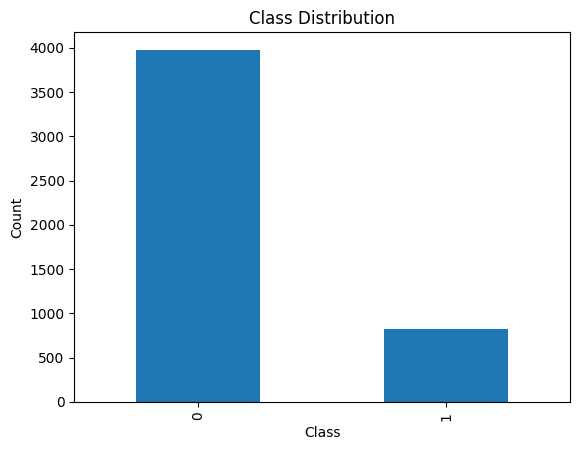

In [74]:
# EDA to Check class imbalance
class_counts = y_train.value_counts()
total_samples = len(y_train)

# Calculate class percentages
class_percentages = class_counts / total_samples * 100

# Create a DataFrame for better presentation
class_distribution_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})

# Print the class distribution
print("Class Distribution:")
print(class_distribution_df)

# Plot the class distribution
class_counts.plot(kind='bar', title='Class Distribution', xlabel='Class', ylabel='Count')
plt.show()

## 3.1: Baseline model

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Removing irrelevant features
X_train_2 = X_train.drop(['UserID', 'FirstName', 'LastName', 'LicensePlate', 'Street', 'City'], axis=1)

# Define numeric and categorical features
numeric_features = X_train_2.select_dtypes(include=['int64']).columns
categorical_features = X_train_2.select_dtypes(include=['object']).columns

# Create a pipeline for categorical transformation
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessor with the model in a pipeline
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Evaluate baseline model using cross_val_score
baseline_scores = cross_val_score(baseline_model, X_train_2, y_train, cv=5, scoring='f1')

# Print mean F1 score
print("Mean F1 Score Baseline Model:", baseline_scores.mean())

Mean F1 Score Baseline Model: 0.05634144203918714


## 3.2: Adding feature engineering

In [89]:
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# Set random seeds for reproducibility
np.random.seed(42)

# Removing irrelevant features
X_train_2 = X_train.drop(['UserID', 'FirstName', 'LastName', 'LicensePlate', 'Street', 'City'], axis=1)

# Feature Engineering Steps:

# FE1: Convert 'Sex' column to numeric format
X_train_2['Sex'] = X_train_2['Sex'].map({'F': 0, 'M': 1})

# FE2: Calculating age based on DOB
X_train_2['DateOfBirth'] = pd.to_datetime(X_train_2['DateOfBirth'], format='%Y-%m-%d')
current_date = datetime.now()
X_train_2['Age'] = (current_date - X_train_2['DateOfBirth']).astype('<m8[Y]')
X_train_2 = X_train_2.drop('DateOfBirth', axis=1)

# FE3: Binning numeric features (e.g., 'Age')
bin_encoder = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_2['Age_Binned'] = bin_encoder.fit_transform(X_train_2[['Age']])

# FE4: Handling outliers for 'Amount'
X_train_2['Amount_Scaled'] = RobustScaler().fit_transform(X_train_2[['Amount']])

# FE5: Interaction between previous default and amount
X_train_2['Prev_Def_Amount'] = X_train_2['PreviousDefault'] * X_train_2['Amount']

# Define numeric and categorical features (including new interaction features)
numeric_features = X_train_2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_2.select_dtypes(include=['uint8']).columns

# Create preprocessor with PCA for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95, random_state=42))
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create model pipeline
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Evaluate model using cross_val_score
baseline_scores = cross_val_score(baseline_model, X_train_2, y_train, cv=10, scoring='f1')

# Print mean score
print("Mean F1 Score with Feature Engineering:", baseline_scores.mean())

Mean F1 Score with Feature Engineering: 0.6374948678142276


## 3.3: Adding feature selection

F1 Scores for Different Numbers of Features: [0.5201542532860126, 0.5915746549468116, 0.6175775651705055, 0.6261683672234033, 0.6323567927514658, 0.6388445227015586, 0.6371056722128625, 0.63079857173533, 0.6374948678142276]


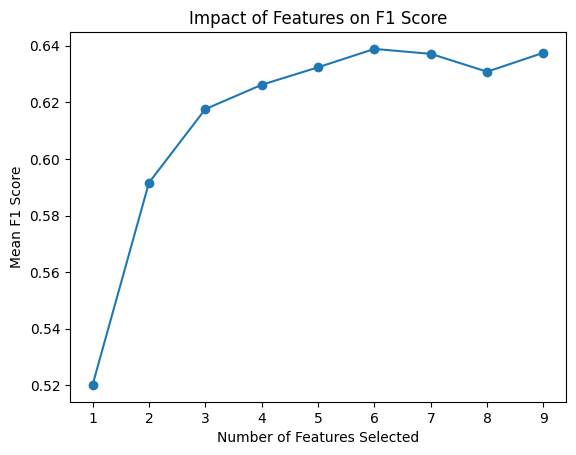

Best Mean F1 Score: 0.6388445227015586
Number of Features for Best F1 Score: 6


In [90]:
#Using RFE to choose the number of features with highest F1 score
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Set a random seed for reproducibility
np.random.seed(42)

# Removing irrelevant features
X_train_2 = X_train.drop(['UserID', 'FirstName', 'LastName', 'LicensePlate', 'Street', 'City'], axis=1)

# Feature Engineering Steps:

# FE1: Convert 'Sex' column to numeric format
X_train_2['Sex'] = X_train_2['Sex'].map({'F': 0, 'M': 1})

# FE2: Calculating age based on DOB
X_train_2['DateOfBirth'] = pd.to_datetime(X_train_2['DateOfBirth'], format='%Y-%m-%d')
current_date = datetime.now()
X_train_2['Age'] = (current_date - X_train_2['DateOfBirth']).astype('<m8[Y]')
X_train_2 = X_train_2.drop('DateOfBirth', axis=1)

# FE3: Binning numeric features (e.g., 'Age')
bin_encoder = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_2['Age_Binned'] = bin_encoder.fit_transform(X_train_2[['Age']])

# FE4: Handling outliers for 'Amount'
X_train_2['Amount_Scaled'] = RobustScaler().fit_transform(X_train_2[['Amount']])

# FE5: Interaction between previous default and amount
X_train_2['Prev_Def_Amount'] = X_train_2['PreviousDefault'] * X_train_2['Amount']

# Define numeric and categorical features (including new interaction features)
numeric_features = X_train_2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_2.select_dtypes(include=['uint8']).columns

#FE6: Create preprocessor with PCA for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95, random_state=42))
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Explore the impact of different numbers of selected features on F1 score
num_features_to_select_range = range(1, 10)
f1_scores = []

for num_features_to_select in num_features_to_select_range:
    # Create model pipeline with RFE for feature selection
    feature_selection_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=num_features_to_select)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Calculate F1 score using cross-validation with cv=10
    f1_score = cross_val_score(feature_selection_model, X_train_2, y_train, cv=10, scoring='f1').mean()
    f1_scores.append(f1_score)

# Print the F1 scores for different numbers of selected features
print("F1 Scores for Different Numbers of Features:", f1_scores)

# Visualize the impact of different numbers of selected features on F1 score
plt.plot(num_features_to_select_range, f1_scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Mean F1 Score')
plt.title('Impact of Features on F1 Score')
plt.show()

# Find the index of the best F1 score and the corresponding number of features
best_f1_index = np.argmax(f1_scores)
best_num_features = num_features_to_select_range[best_f1_index]
best_f1_score = f1_scores[best_f1_index]

# Print the best F1 score and the corresponding number of features
print("Best Mean F1 Score:", best_f1_score)
print("Number of Features for Best F1 Score:", best_num_features)

## 3.4: Adding hyperparameter tuning

In [8]:
#Hyperparameter tuning using GridSearchCV on estimators and max depth
import pandas as pd
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import numpy as np

# Removing irrelevant features
X_train_2 = X_train.drop(['UserID', 'FirstName', 'LastName', 'LicensePlate', 'Street', 'City'], axis=1)

# Feature Engineering Steps:

# FE1: Convert 'Sex' column to numeric format
X_train_2['Sex'] = X_train_2['Sex'].map({'F': 0, 'M': 1})

# FE2: Calculating age based on DOB
X_train_2['DateOfBirth'] = pd.to_datetime(X_train_2['DateOfBirth'], format='%Y-%m-%d')
current_date = datetime.now()
X_train_2['Age'] = (current_date - X_train_2['DateOfBirth']).astype('<m8[Y]')
X_train_2 = X_train_2.drop('DateOfBirth', axis=1)

# FE3: Binning numeric features (e.g., 'Age')
bin_encoder = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_2['Age_Binned'] = bin_encoder.fit_transform(X_train_2[['Age']])

# FE4: Handling outliers for 'Amount'
X_train_2['Amount_Scaled'] = RobustScaler().fit_transform(X_train_2[['Amount']])

# FE5: Interaction between previous default amount and amount
X_train_2['Prev_Def_Amount'] = X_train_2['PreviousDefault'] * X_train_2['Amount']

# Define numeric and categorical features (including new interaction features)
numeric_features = X_train_2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_2.select_dtypes(include=['uint8']).columns

# FE6: Create preprocessor with PCA for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95, random_state=42))
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Choose the number of features in RFE
num_features_to_select = 6

# Create model pipeline with RFE for feature selection
feature_selection_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', RFE(estimator=RandomForestClassifier(
        random_state=42, max_depth=20, n_estimators=200), n_features_to_select=num_features_to_select)),
    ('classifier', RandomForestClassifier(random_state=42, max_depth=20, n_estimators=200))
])

# Define the hyperparameter grid
param_grid = {
    'feature_selection__estimator__n_estimators': [150, 175, 200],
    'feature_selection__estimator__max_depth': [20, 22, 25],
    'classifier__n_estimators': [175, 200, 225],
    'classifier__max_depth': [18, 20, 22]
}

# Use GridSearchCV for hyperparameter tuning on the entire dataset
grid_search = GridSearchCV(feature_selection_model, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train_2, y_train)

# Print the best hyperparameters and corresponding F1 score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Hyperparameters: {'classifier__max_depth': 22, 'classifier__n_estimators': 175, 'feature_selection__estimator__max_depth': 15, 'feature_selection__estimator__n_estimators': 200}
Best F1 Score: 0.6439556618781822


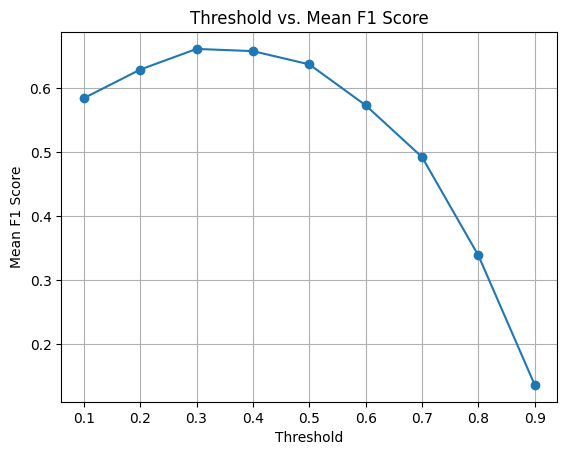

Best Threshold: 0.30000000000000004
Best Mean F1 Score: 0.6613840464870576


In [92]:
#Tuning for the optimal threshold for classification
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Feature Engineering Steps:
X_train_2 = X_train.drop(['UserID', 'FirstName', 'LastName', 'LicensePlate', 'Street', 'City'], axis=1)
X_train_2['Sex'] = X_train_2['Sex'].map({'F': 0, 'M': 1})
X_train_2['DateOfBirth'] = pd.to_datetime(X_train_2['DateOfBirth'], format='%Y-%m-%d')
current_date = datetime.now()
X_train_2['Age'] = (current_date - X_train_2['DateOfBirth']).astype('<m8[Y]')
X_train_2 = X_train_2.drop(['DateOfBirth'], axis=1)
X_train_2['Age_Binned'] = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform').fit_transform(X_train_2[['Age']])
X_train_2['Amount_Scaled'] = RobustScaler().fit_transform(X_train_2[['Amount']])
X_train_2['Prev_Def_Amount'] = X_train_2['PreviousDefault'] * X_train_2['Amount']

# Define numeric and categorical features
numeric_features = X_train_2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_2.select_dtypes(include=['uint8']).columns

# Best hyperparameters obtained from GridSearchCV
best_hyperparameters = {'feature_selection__estimator__max_depth': 15,
                        'feature_selection__estimator__n_estimators': 200,
                        'classifier__max_depth': 22,
                        'classifier__n_estimators': 175}

# Create model pipeline with hardcoded best hyperparameters
best_feature_selection_model = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42))
            ]), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])),
    ('feature_selection', RFE(estimator=RandomForestClassifier(
        random_state=42,
        max_depth=best_hyperparameters['feature_selection__estimator__max_depth'],
        n_estimators=best_hyperparameters['feature_selection__estimator__n_estimators']),
        n_features_to_select=6)),
    ('classifier', RandomForestClassifier(
        random_state=42,
        max_depth=best_hyperparameters['classifier__max_depth'],
        n_estimators=best_hyperparameters['classifier__n_estimators']))
])


# Fit the model with the entire training dataset
best_feature_selection_model.fit(X_train_2, y_train)

# Define the threshold range
thresholds = np.arange(0.1, 1.0, 0.1)

# Calculate mean F1 scores for each threshold
predicted_probs = cross_val_predict(best_feature_selection_model, X_train_2, y_train, cv=10, method='predict_proba')[:, 1]
mean_f1_scores = [f1_score(y_train, (predicted_probs >= t).astype(int)) for t in thresholds]

# Plot the graph
plt.plot(thresholds, mean_f1_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Mean F1 Score')
plt.title('Threshold vs. Mean F1 Score')
plt.grid(True)
plt.show()

# Print the best threshold and its corresponding mean F1 score
best_threshold = thresholds[np.argmax(mean_f1_scores)]
print("Best Threshold:", best_threshold)
print("Best Mean F1 Score:", max(mean_f1_scores))

Consolidated Results from the Modeling Exercise:

1. **Baseline Model (Step 1):**
   - Achieved an F1 score of 0.056 in the baseline model.

2. **Feature Engineering (Step 2):**
   - Achieved an F1 score of 0.637, representing a remarkable improvement of 1038% over the baseline model score of 0.056.

3. **Feature Selection (RFE) (Step 3):**
   - Achieved an F1 score of 0.638 with RFE = 6 features, showcasing a marginal enhancement of 0.2% over the Feature Engineering step.

4. **Hyperparameter Tuning (Max Depth and Number of Iterations) (Step 4.1):**
   - Achieved an F1 score of 0.644, resulting in a 1% increase compared to Feature Selection.

5. **Threshold Optimization (Step 4.2):**
   - Achieved the final F1 score of 0.661, demonstrating a 3% improvement over Hyperparameter Tuning.


## 3.5: Performance estimation on testing data

In [94]:
from sklearn.model_selection import cross_val_predict
import pandas as pd
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Removing irrelevant features
X_test_2 = X_test.drop(['UserID', 'FirstName', 'LastName', 'LicensePlate', 'Street', 'City'], axis=1)

# Feature Engineering Steps:

# FE1: Convert 'Sex' column to numeric format
X_test_2['Sex'] = X_test_2['Sex'].map({'F': 0, 'M': 1})

# FE2: Calculating age based on DOB
X_test_2['DateOfBirth'] = pd.to_datetime(X_test_2['DateOfBirth'], format='%Y-%m-%d')
current_date = datetime.now()
X_test_2['Age'] = (current_date - X_test_2['DateOfBirth']).astype('<m8[Y]')
X_test_2 = X_test_2.drop('DateOfBirth', axis=1)

# FE3: Binning numeric features (e.g., 'Age')
bin_encoder = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_test_2['Age_Binned'] = bin_encoder.fit_transform(X_test_2[['Age']])

# FE4: Handling outliers for 'Amount'
X_test_2['Amount_Scaled'] = RobustScaler().fit_transform(X_test_2[['Amount']])

# FE5: Log transformation for 'Amount'
X_test_2['Prev_Def_Amount'] = X_test_2['PreviousDefault'] * X_test_2['Amount']

# Define numeric and categorical features (including new interaction features)
numeric_features = X_test_2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_test_2.select_dtypes(include=['uint8']).columns

# Best hyperparameters obtained from GridSearchCV
best_hyperparameters = {'feature_selection__estimator__max_depth': 15,
                        'feature_selection__estimator__n_estimators': 200,
                        'classifier__max_depth': 22,
                        'classifier__n_estimators': 175}


# Create model pipeline with hardcoded best hyperparameters
best_feature_selection_model = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42))
            ]), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])),
    ('feature_selection', RFE(estimator=RandomForestClassifier(
        random_state=42,
        max_depth=best_hyperparameters['feature_selection__estimator__max_depth'],
        n_estimators=best_hyperparameters['feature_selection__estimator__n_estimators']),
        n_features_to_select=6)),
    ('classifier', RandomForestClassifier(
        random_state=42,
        max_depth=best_hyperparameters['classifier__max_depth'],
        n_estimators=best_hyperparameters['classifier__n_estimators']))
])

# Use cross_val_predict to get predicted probabilities
y_probabilities = cross_val_predict(best_feature_selection_model, X_test_2, y_test, cv=10, method='predict_proba')

# Using the best threshold from training data model
threshold = best_threshold

# Convert probabilities to binary predictions based on the threshold
y_predictions = (y_probabilities[:, 1] > threshold).astype(int)

# Evaluate F1 score using the threshold
f1 = f1_score(y_test, y_predictions)

# Print the mean F1 score and individual F1 score with the threshold
print("Test F1 Score with Threshold {}: {}".format(threshold, f1))

Test F1 Score with Threshold 0.30000000000000004: 0.6877637130801687


# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000.

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations.

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.




***Answer:***


Uncle Steve faces the decision of selecting the most cost-effective maintenance strategy from three scenarios. To aid his decision-making, we'll evaluate his historical operational data without and with the RNN and random forest models. Analyzing the confusion and cost matrices for each model will allow us to calculate the associated costs, facilitating the choice of the most cost-effective approach.

***Scenario 1: No Predictive Maintenance Models:***

1.   According to historical cost data, each turbine failure incurs a repair
     cost of $20,000

2.   Examining the actual fail and no fail data reveals a total of 256 failures

3.   In the absence of a maintenance model, Uncle Steve would have spent the  
     total **number of turbine failures** (256) multiplied by the **cost of repairs per turbine** (20,000)

4.   In this scenario, where no inspections for potential failures are
     conducted, the cost is solely the total cost of repairs.

5.   This scenario would result in a total cost of
     **$5,120,000**


***Scenario 2: Deploying the Random Forest Predictive Maintenance Model:***

1. Deployment of predictive maintenance models involves two primary costs:
   inspection of turbines predicted to fail (regardless of actual failure) at **500** and servicing cost of **2,000** for turbines in bad health.

2. Associating these costs with the confusion matrix:
*    Cost for Predicted Fail and Actual Fail (TP), this would entail an inspection cost followed by a servicing cost: $500 + $2,000 = $2,500

*    Cost for Predicted Fail and Actual No Fail (FP), since the model predicts that this turbine would fail but in reality it doesnt, it would entail the inspection cost: $500

*    Cost for Predicted No Fail and Actual Fail (FN), after discovering that the turbine has failed it would incur repair cost: $20,000

*    Cost for Predicted No Fail and Actual No Fail (TN), since there is no inspection or failure, this would incur no cost: $0

3. Multiplying the corresponding values of the Confusion Matrix and Cost Matrix
   results in a total cost for Scenario 2 of **$1,627,500**.

#####**Confusion Matrix**

| Random Forest | Predicted Fail | Predicted No Fail |
|---------------|----------------|-------------------|
| Actual Fail   | 201 (TP)        | 55 (FN)           |
| Actual No Fail| 50 (FP)         | 255,195 (TN)      |

#####**Cost Matrix**

| Random Forest | Predicted Fail | Predicted No Fail |
|---------------|----------------|-------------------|
| Actual Fail   | 2,500 (TP)      | 20,000 (FN)       |
| Actual No Fail| 500 (FP)        | 0 (TN)            |








**Scenario 3: Deploying the RNN Predictive Maintenance Model:**

1. The cost structure and cost matrix for Scenario 3 mirror those of Scenario 2.
2. Multiplying the corresponding values of the Confusion Matrix and Cost Matrix
  for this scenario yields a total cost for Scenario 3 of **$1,765,000.**



#####***Confusion Matrix***

| Random Forest | Predicted Fail | Predicted No Fail |
|---------------|----------------|-------------------|
| Actual Fail   | 226 (TP)        | 30 (FN)           |
| Actual No Fail| 1,200 (FP)         | 254,045 (TN)      |

#####**Cost Matrix**

| Random Forest | Predicted Fail | Predicted No Fail |
|---------------|----------------|-------------------|
| Actual Fail   | 2,500 (TP)      | 20,000 (FN)       |
| Actual No Fail| 500 (FP)        | 0 (TN)            |




***Conclusion:***

Based on the analysis, the **recommendation to Uncle Steve is to opt for Scenario 2 (Random Forest)**, which proves to be the most cost-effective strategy for turbine maintenance, costing (**$1,627,500**). This recommendation takes into account the associated costs of inspections and servicing, resulting in a lower total cost compared to both Scenario 1 (No Predictive Maintenance Models) and Scenario 3 (RNN Predictive Maintenance Model). This is also in-line with his intuition that Random forest having a higher precision may be the better ML model to deploy